In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical


In [2]:
input_dir = 'archive (18)/Data'
categories = ['glioma_tumor','meningioma_tumor','normal','pituitary_tumor']

data = []
labels = []

for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)
        

In [3]:
number_classes = {
    'glioma_tumor': len(os.listdir('archive (18)/Data/glioma_tumor')),
    'meningioma_tumor': len(os.listdir('archive (18)/Data/meningioma_tumor')),
    'normal': len(os.listdir('archive (18)/Data/normal')),
    'pituitary_tumor': len(os.listdir('archive (18)/Data/pituitary_tumor'))
}

In [4]:
number_classes

{'glioma_tumor': 901,
 'meningioma_tumor': 913,
 'normal': 438,
 'pituitary_tumor': 844}

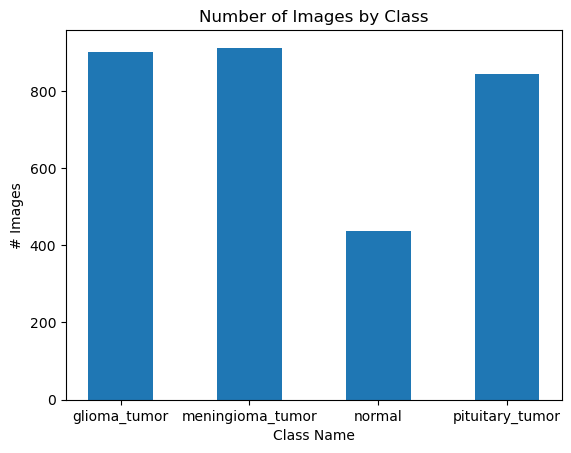

In [5]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [6]:
from PIL import Image
import dask.bag as bag
from dask import diagnostics


In [7]:
directories = {
    'glioma_tumor': 'archive (18)/Data/glioma_tumor',
    'meningioma_tumor': 'archive (18)/Data/meningioma_tumor',
    'normal': 'archive (18)/Data/normal',
    'pituitary_tumor': 'archive (18)/Data/pituitary_tumor'
}

def get_dims(file):

    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [8]:
get_dims('archive (18)/Data/glioma_tumor/G_1.jpg')

(256, 256)

901
[########################################] | 100% Completed | 2.04 ss
913
[########################################] | 100% Completed | 2.25 ss
438
[########################################] | 100% Completed | 1.94 ss
844
[########################################] | 100% Completed | 2.28 ss


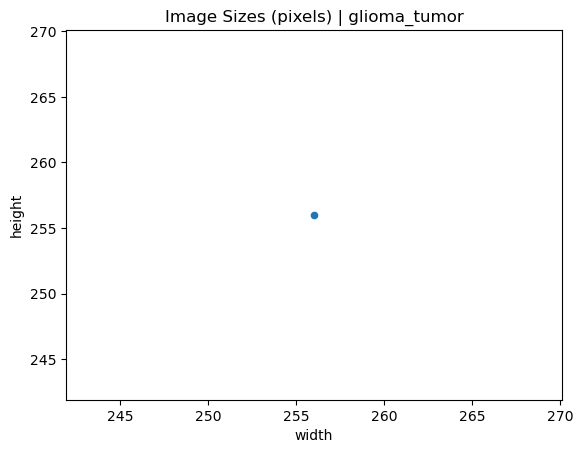

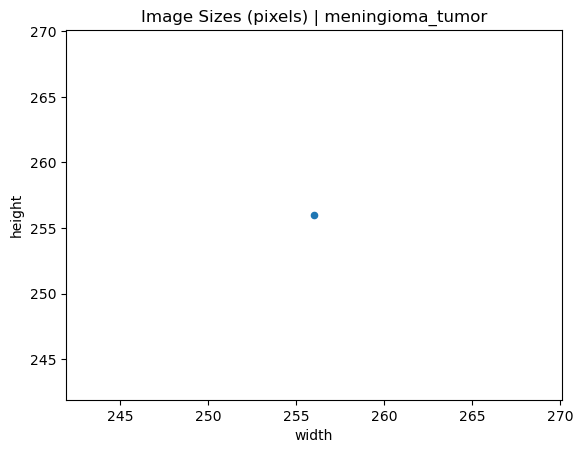

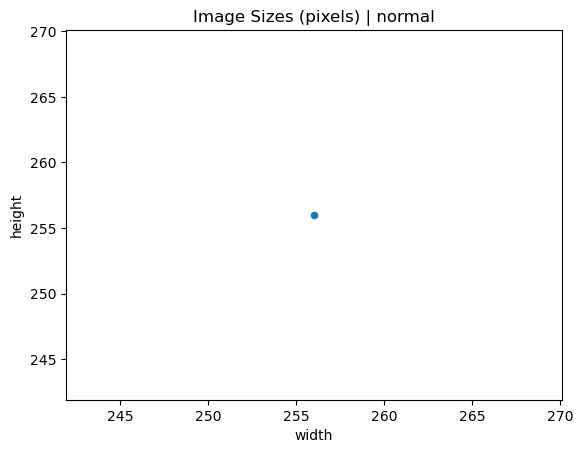

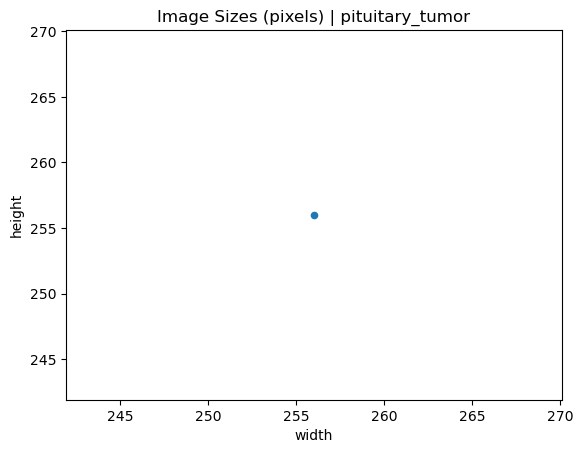

In [9]:
for n,d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    print(len(filelist))
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

In [10]:
data = np.asarray(data)
labels = np.asarray(labels)

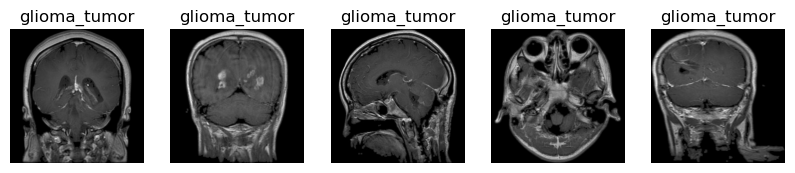

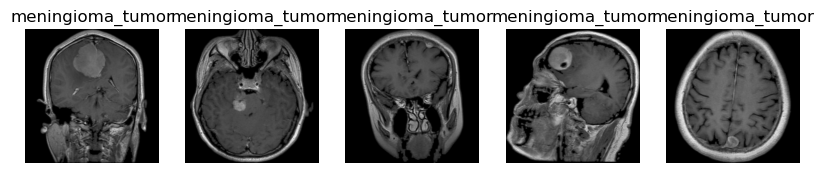

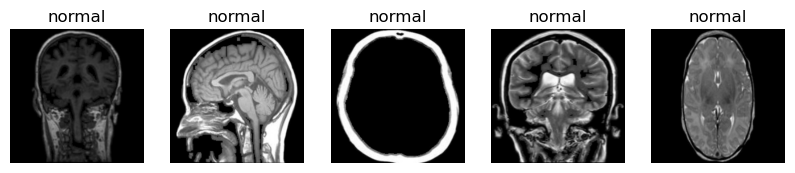

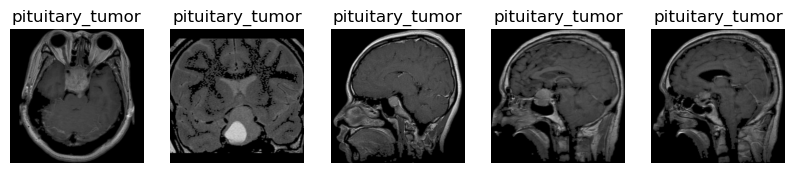

In [11]:
import random
from PIL import Image
for i in directories.values():
    image_files = os.listdir(i) 
    sampled_images = random.sample(image_files, 5)


    plt.figure(figsize=(10, 10)) 
    for j, image_file in enumerate(sampled_images):
        img = Image.open(os.path.join(i, image_file))
        plt.subplot(1, 5, j + 1)
        plt.imshow(img)
        plt.axis('off')
        parts = i.split('/')
        plt.title(parts[-1])
plt.show()


In [12]:
#What can I do about the different angles that photos are taken from?

In [13]:
data

array([[1.29676122e-12, 1.29676122e-12, 1.29676122e-12, ...,
        1.74988130e-05, 1.74988130e-05, 1.74988130e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33767273e-12, 1.33767273e-12, 1.33767273e-12],
       [4.22922865e-14, 4.22922865e-14, 4.22922865e-14, ...,
        4.41609308e-09, 4.41609308e-09, 4.41609308e-09],
       ...,
       [3.82682482e-09, 3.82682482e-09, 3.82682482e-09, ...,
        4.71911205e-05, 4.71911205e-05, 4.71911205e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.41258522e-03, 1.41258522e-03, 1.41258522e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.61911932e-04, 1.61911932e-04, 1.61911932e-04]])

In [14]:
len(data)

3096

In [15]:
len(labels) 

3096

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=.2,stratify=labels,shuffle=True,random_state=123)

In [17]:
classifier = SVC()

parameters = [{'gamma': [0.01,0.001,0.0001],'C':[1,10,100,1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_

In [18]:
y_preds_svc = best_model.predict(X_test)
print(classification_report(y_test,y_preds_svc))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       180
           1       0.84      0.80      0.82       183
           2       0.88      0.88      0.88        88
           3       0.90      0.93      0.92       169

    accuracy                           0.86       620
   macro avg       0.86      0.86      0.86       620
weighted avg       0.86      0.86      0.86       620



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Keras is simplier to use 
#Pytorch is more "Pythonic"
#Tenosr flow is the most complex to learn



In [20]:
print(X_train.shape)


(2476, 675)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(600, input_shape=(675,), activation='relu'))  
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=100)
y_preds = model.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)

print(classification_report(y_test,class_predictions))

Epoch 1/100


78/78 [==============================] - 1s 5ms/step - loss: 1.2911 - accuracy: 0.3740
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 1.1077 - accuracy: 0.5044
Epoch 3/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9948 - accuracy: 0.5743
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9352 - accuracy: 0.5941
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8978 - accuracy: 0.6099
Epoch 6/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8506 - accuracy: 0.6361
Epoch 7/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8100 - accuracy: 0.6716
Epoch 8/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8191 - accuracy: 0.6515
Epoch 9/100
78/78 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.7019
Epoch 10/100
78/78 [==============================] - 0s 5ms/step - loss: 0.7252 - accuracy: 0.6902
Epoch 1

78/78 [==============================] - 0s 6ms/step - loss: 0.1371 - accuracy: 0.9483
Epoch 79/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0554 - accuracy: 0.9802
Epoch 80/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9847
Epoch 81/100
78/78 [==============================] - 0s 6ms/step - loss: 0.1418 - accuracy: 0.9495
Epoch 82/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0802 - accuracy: 0.9717
Epoch 83/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.9729
Epoch 84/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0842 - accuracy: 0.9697
Epoch 85/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9782
Epoch 86/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 87/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.9960
Epoch 88/100


In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='min')
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 9ms/step - loss: 0.0757 - accuracy: 0.9758 - val_loss: 0.8443 - val_accuracy: 0.8613
Epoch 2/100
25/78 [========>.....................] - ETA: 0s - loss: 0.0631 - accuracy: 0.9787

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 0s 6ms/step - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.7709 - val_accuracy: 0.8806
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 0.0633 - accuracy: 0.9786 - val_loss: 0.9125 - val_accuracy: 0.8468
Epoch 4/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.8615 - val_accuracy: 0.8613
Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.9377 - val_accuracy: 0.8548
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9802 - val_loss: 1.0020 - val_accuracy: 0.8500
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0994 - accuracy: 0.9673 - val_loss: 0.9804 - val_accuracy: 0.8226
Epoch 8/100
78/78 [==============================] - 0s 5ms/step - loss: 0.1083 - accuracy: 0.9624 - val_loss: 0.8852 - val_accuracy: 0.8355
Epoch 9/100
78/78 [======

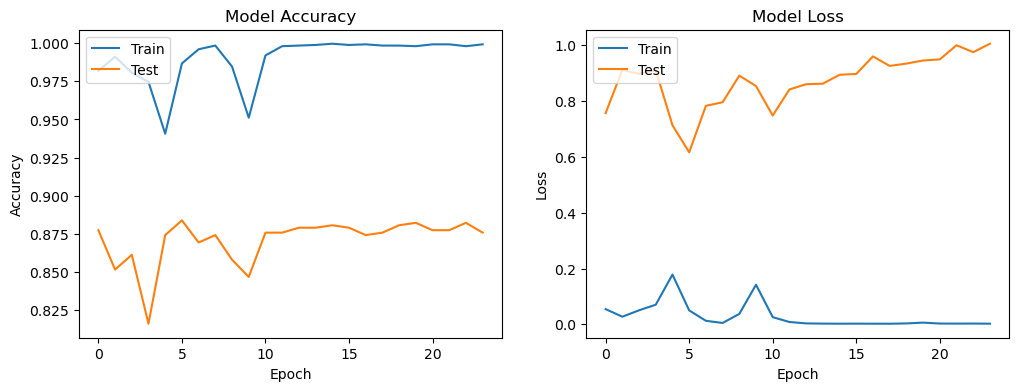

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [26]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout

In [27]:
model2 = Sequential()
model2.add(Dense(600, input_shape=(675,), activation='relu'))
model2.add(Dropout(.05))
model2.add(Dense(300, activation='relu'))
model2.add(Dropout(.05))
model2.add(Dense(150, activation='relu'))
model2.add(Dense(75, activation='relu'))
model2.add(Dropout(.05))
model2.add(Dense(4, activation='softmax'))




model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
checkpoint = ModelCheckpoint('model_2.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model2.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 1.2791 - accuracy: 0.3942 - val_loss: 1.1487 - val_accuracy: 0.5097
Epoch 2/100
27/78 [=========>....................] - ETA: 0s - loss: 1.1001 - accuracy: 0.5185

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 1s 7ms/step - loss: 1.0922 - accuracy: 0.5311 - val_loss: 0.9863 - val_accuracy: 0.5935
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0464 - accuracy: 0.5473 - val_loss: 1.0105 - val_accuracy: 0.5629
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9876 - accuracy: 0.5767 - val_loss: 0.9630 - val_accuracy: 0.6032
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 0.8969 - accuracy: 0.6208 - val_loss: 0.9367 - val_accuracy: 0.5919
Epoch 6/100
78/78 [==============================] - 1s 7ms/step - loss: 0.8624 - accuracy: 0.6385 - val_loss: 0.9044 - val_accuracy: 0.5790
Epoch 7/100
78/78 [==============================] - 1s 7ms/step - loss: 0.8446 - accuracy: 0.6535 - val_loss: 0.8822 - val_accuracy: 0.6274
Epoch 8/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8299 - accuracy: 0.6527 - val_loss: 0.7882 - val_accuracy: 0.7048
Epoch 9/100
78/78 [======

Epoch 60/100
78/78 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.9176 - val_loss: 0.5057 - val_accuracy: 0.8306
Epoch 61/100
78/78 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.9216 - val_loss: 0.5087 - val_accuracy: 0.8371
Epoch 62/100
78/78 [==============================] - 1s 7ms/step - loss: 0.1819 - accuracy: 0.9382 - val_loss: 0.5115 - val_accuracy: 0.8500
Epoch 63/100
78/78 [==============================] - 1s 7ms/step - loss: 0.2109 - accuracy: 0.9229 - val_loss: 0.5886 - val_accuracy: 0.8194
Epoch 64/100
78/78 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.9229 - val_loss: 0.4808 - val_accuracy: 0.8645
Epoch 65/100
78/78 [==============================] - 1s 7ms/step - loss: 0.1680 - accuracy: 0.9398 - val_loss: 0.5460 - val_accuracy: 0.8694
Epoch 66/100
78/78 [==============================] - 1s 7ms/step - loss: 0.1599 - accuracy: 0.9418 - val_loss: 0.6781 - val_accuracy: 0.8177
Epoch 

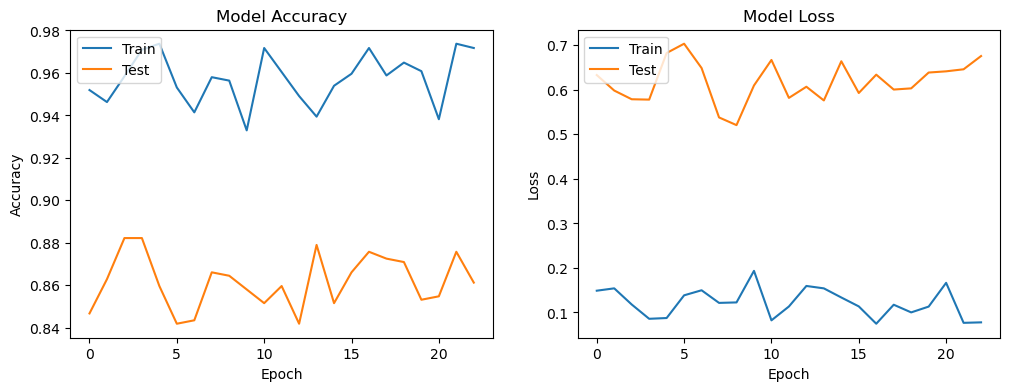

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [30]:
model3 = Sequential()
   
model3.add(Dense(600, input_shape=(675,), activation='relu',kernel_regularizer=l2(0.01),  
                bias_regularizer=l1(0.01)))  
model3.add(Dense(300, activation='relu',kernel_regularizer=l2(0.01),  
                bias_regularizer=l1(0.01)))
model3.add(Dense(150, activation='relu',kernel_regularizer=l2(0.01),  
                bias_regularizer=l1(0.01)))
model3.add(Dense(75, activation='relu'))
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:

early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history3 = model3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model3.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 7ms/step - loss: 5.7011 - accuracy: 0.3877 - val_loss: 2.1803 - val_accuracy: 0.4048
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 1.6866 - accuracy: 0.4681 - val_loss: 1.3825 - val_accuracy: 0.5468
Epoch 3/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3667 - accuracy: 0.5113 - val_loss: 1.2847 - val_accuracy: 0.4903
Epoch 4/100
78/78 [==============================] - 0s 6ms/step - loss: 1.3199 - accuracy: 0.5101 - val_loss: 1.2379 - val_accuracy: 0.5323
Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 1.2394 - accuracy: 0.5258 - val_loss: 1.1421 - val_accuracy: 0.6194
Epoch 6/100
78/78 [==============================] - 0s 5ms/step - loss: 1.2144 - accuracy: 0.5460 - val_loss: 1.2172 - val_accuracy: 0.5242
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 1.1991 - accuracy: 0.5400 - val_loss: 1.1064 - val_accuracy: 0.5806
Epoch 8/100
7

Epoch 59/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8124 - accuracy: 0.7637 - val_loss: 1.0261 - val_accuracy: 0.6903
Epoch 60/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8042 - accuracy: 0.7557 - val_loss: 0.9249 - val_accuracy: 0.7032
Epoch 61/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8097 - accuracy: 0.7528 - val_loss: 0.9041 - val_accuracy: 0.7145
Epoch 62/100
78/78 [==============================] - 0s 5ms/step - loss: 0.7924 - accuracy: 0.7686 - val_loss: 0.8491 - val_accuracy: 0.7645
Epoch 62: early stopping
Epoch 1/200
78/78 [==============================] - 0s 6ms/step - loss: 0.7788 - accuracy: 0.7750 - val_loss: 0.9131 - val_accuracy: 0.7274
Epoch 2/200
78/78 [==============================] - 0s 6ms/step - loss: 0.7630 - accuracy: 0.7750 - val_loss: 0.8444 - val_accuracy: 0.7790
Epoch 3/200
78/78 [==============================] - 0s 6ms/step - loss: 0.8019 - accuracy: 0.7742 - val_loss: 0.8757 - val_a

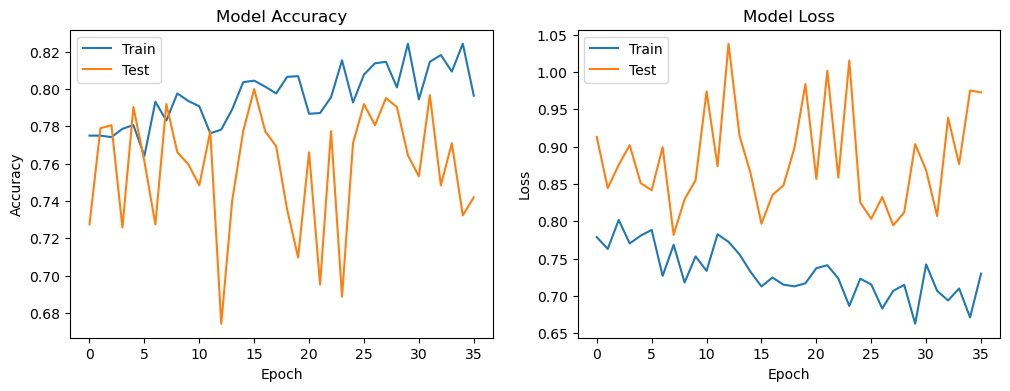

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [33]:
model4 = Sequential()

model4.add(Dense(1000, input_shape=(675,), activation='relu'))
model4.add(Dense(500, activation='relu'))
model4.add(Dense(250, activation='relu'))
model4.add(Dense(4, activation='softmax'))

model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model4.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history4 = model4.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model4.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 2s 13ms/step - loss: 1.3035 - accuracy: 0.3788 - val_loss: 1.1368 - val_accuracy: 0.4806
Epoch 2/100
78/78 [==============================] - 1s 11ms/step - loss: 1.0832 - accuracy: 0.5198 - val_loss: 1.1664 - val_accuracy: 0.4839
Epoch 3/100
78/78 [==============================] - 1s 11ms/step - loss: 0.9959 - accuracy: 0.5662 - val_loss: 1.0146 - val_accuracy: 0.5677
Epoch 4/100
78/78 [==============================] - 1s 11ms/step - loss: 0.9295 - accuracy: 0.6022 - val_loss: 0.8351 - val_accuracy: 0.6339
Epoch 5/100
78/78 [==============================] - 1s 11ms/step - loss: 0.8612 - accuracy: 0.6410 - val_loss: 0.8328 - val_accuracy: 0.6581
Epoch 6/100
78/78 [==============================] - 1s 11ms/step - loss: 0.8135 - accuracy: 0.6603 - val_loss: 0.8531 - val_accuracy: 0.6516
Epoch 7/100
78/78 [==============================] - 1s 11ms/step - loss: 0.7935 - accuracy: 0.6773 - val_loss: 0.7817 - val_accuracy: 0.6790
Epoch 

78/78 [==============================] - 1s 10ms/step - loss: 0.1227 - accuracy: 0.9552 - val_loss: 0.6053 - val_accuracy: 0.8516
Epoch 59/100
78/78 [==============================] - 1s 10ms/step - loss: 0.1491 - accuracy: 0.9402 - val_loss: 0.6941 - val_accuracy: 0.8290
Epoch 60/100
78/78 [==============================] - 1s 10ms/step - loss: 0.1315 - accuracy: 0.9515 - val_loss: 0.7524 - val_accuracy: 0.8177
Epoch 61/100
78/78 [==============================] - 1s 10ms/step - loss: 0.2661 - accuracy: 0.9075 - val_loss: 0.6197 - val_accuracy: 0.8565
Epoch 62/100
78/78 [==============================] - 1s 10ms/step - loss: 0.1176 - accuracy: 0.9584 - val_loss: 0.7130 - val_accuracy: 0.8645
Epoch 63/100
78/78 [==============================] - 1s 10ms/step - loss: 0.1382 - accuracy: 0.9515 - val_loss: 0.6440 - val_accuracy: 0.8371
Epoch 64/100
78/78 [==============================] - 1s 11ms/step - loss: 0.0836 - accuracy: 0.9721 - val_loss: 0.6835 - val_accuracy: 0.8645
Epoch 65/100

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 1s 11ms/step - loss: 0.0378 - accuracy: 0.9867 - val_loss: 0.6969 - val_accuracy: 0.8532
Epoch 69/100
78/78 [==============================] - 1s 10ms/step - loss: 0.0581 - accuracy: 0.9794 - val_loss: 0.9513 - val_accuracy: 0.8290
Epoch 70/100
78/78 [==============================] - 1s 11ms/step - loss: 0.1319 - accuracy: 0.9540 - val_loss: 0.8286 - val_accuracy: 0.8452
Epoch 71/100
78/78 [==============================] - 1s 11ms/step - loss: 0.1021 - accuracy: 0.9600 - val_loss: 0.8868 - val_accuracy: 0.8161
Epoch 72/100
78/78 [==============================] - 1s 11ms/step - loss: 0.1478 - accuracy: 0.9467 - val_loss: 0.7123 - val_accuracy: 0.8306
Epoch 73/100
78/78 [==============================] - 1s 11ms/step - loss: 0.0403 - accuracy: 0.9903 - val_loss: 0.7207 - val_accuracy: 0.8645
Epoch 73: early stopping
Epoch 1/100
78/78 [==============================] - 1s 11ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.7682 - val_accur

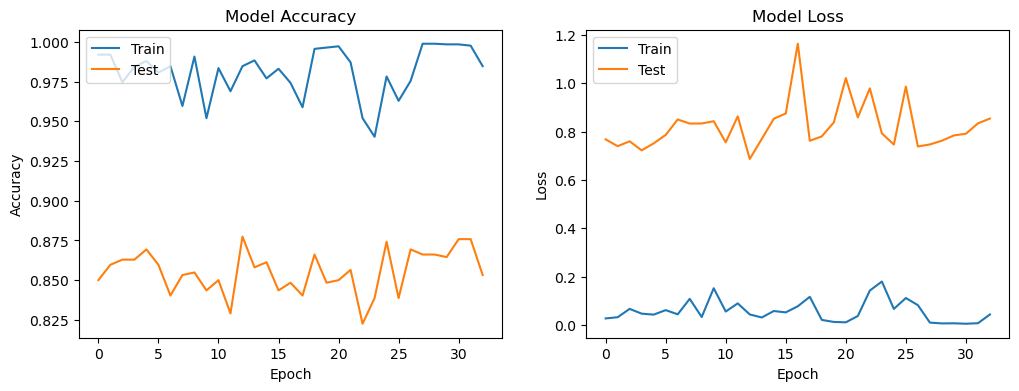

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [35]:
model5 = Sequential()

model5.add(Dense(1000, input_shape=(675,), activation='relu',kernel_regularizer=l2(0.01),  
                bias_regularizer=l1(0.01)))

model5.add(Dense(500, activation='relu'))
model5.add(Dense(250, activation='relu'))
model5.add(Dense(4, activation='softmax'))


model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model5.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history5 = model5.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model5.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 2s 12ms/step - loss: 3.7245 - accuracy: 0.3562 - val_loss: 1.5925 - val_accuracy: 0.3710
Epoch 2/100
78/78 [==============================] - 1s 10ms/step - loss: 1.3500 - accuracy: 0.4588 - val_loss: 1.1752 - val_accuracy: 0.5500
Epoch 3/100
78/78 [==============================] - 1s 10ms/step - loss: 1.2318 - accuracy: 0.5085 - val_loss: 1.1201 - val_accuracy: 0.5726
Epoch 4/100
78/78 [==============================] - 1s 10ms/step - loss: 1.1629 - accuracy: 0.5388 - val_loss: 1.0604 - val_accuracy: 0.5919
Epoch 5/100
78/78 [==============================] - 1s 11ms/step - loss: 1.0859 - accuracy: 0.5674 - val_loss: 1.0772 - val_accuracy: 0.5548
Epoch 6/100
78/78 [==============================] - 1s 10ms/step - loss: 1.1215 - accuracy: 0.5618 - val_loss: 1.1091 - val_accuracy: 0.5452
Epoch 7/100
78/78 [==============================] - 1s 10ms/step - loss: 1.0749 - accuracy: 0.5929 - val_loss: 1.2553 - val_accuracy: 0.4774
Epoch 

78/78 [==============================] - 1s 10ms/step - loss: 0.7033 - accuracy: 0.7977 - val_loss: 0.8104 - val_accuracy: 0.7661
Epoch 59/100
78/78 [==============================] - 1s 10ms/step - loss: 0.7029 - accuracy: 0.7944 - val_loss: 1.0224 - val_accuracy: 0.7032
Epoch 60/100
78/78 [==============================] - 1s 10ms/step - loss: 0.7112 - accuracy: 0.7851 - val_loss: 0.7858 - val_accuracy: 0.7516
Epoch 61/100
78/78 [==============================] - 1s 10ms/step - loss: 0.6963 - accuracy: 0.7904 - val_loss: 1.1212 - val_accuracy: 0.6806
Epoch 62/100
78/78 [==============================] - 1s 9ms/step - loss: 0.7020 - accuracy: 0.8001 - val_loss: 0.8519 - val_accuracy: 0.7484
Epoch 63/100
78/78 [==============================] - 1s 11ms/step - loss: 0.7179 - accuracy: 0.7920 - val_loss: 0.8889 - val_accuracy: 0.7371
Epoch 64/100
78/78 [==============================] - 1s 10ms/step - loss: 0.6768 - accuracy: 0.8065 - val_loss: 0.8676 - val_accuracy: 0.7532
Epoch 65/100


78/78 [==============================] - 1s 11ms/step - loss: 0.5138 - accuracy: 0.8893 - val_loss: 0.7530 - val_accuracy: 0.8258
Epoch 22/100
78/78 [==============================] - 1s 11ms/step - loss: 0.5528 - accuracy: 0.8627 - val_loss: 0.7692 - val_accuracy: 0.8194
Epoch 23/100
78/78 [==============================] - 1s 12ms/step - loss: 0.5011 - accuracy: 0.8825 - val_loss: 0.7654 - val_accuracy: 0.8355
Epoch 24/100
78/78 [==============================] - 1s 11ms/step - loss: 0.5600 - accuracy: 0.8554 - val_loss: 0.8114 - val_accuracy: 0.8113
Epoch 25/100
78/78 [==============================] - 1s 10ms/step - loss: 0.5652 - accuracy: 0.8643 - val_loss: 0.8225 - val_accuracy: 0.8161
Epoch 26/100
78/78 [==============================] - 1s 11ms/step - loss: 0.5336 - accuracy: 0.8675 - val_loss: 0.7831 - val_accuracy: 0.8274
Epoch 27/100
78/78 [==============================] - 1s 12ms/step - loss: 0.5215 - accuracy: 0.8716 - val_loss: 0.9667 - val_accuracy: 0.7613
Epoch 28/100

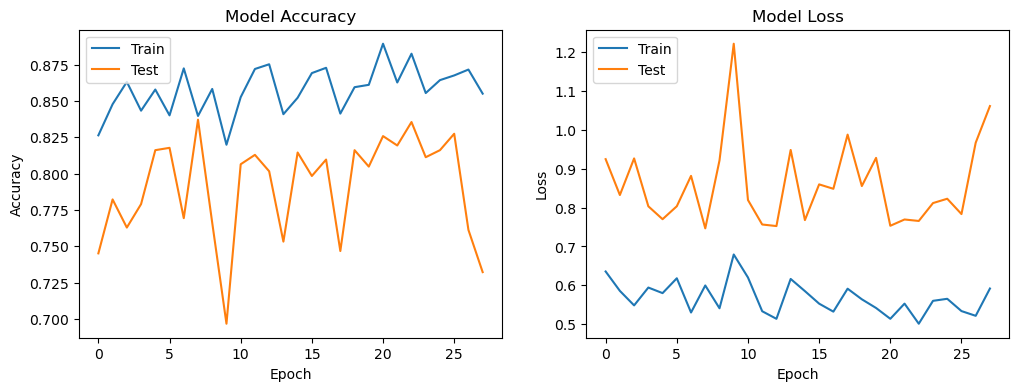

In [37]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [44]:
model6 = Sequential()
model6.add(Dense(600, input_shape=(675,), activation='relu'))
model6.add(Dropout(.2))
model6.add(Dense(300, activation='relu'))
model6.add(Dropout(.2))
model6.add(Dense(150, activation='relu'))
model6.add(Dense(75, activation='relu'))
model6.add(Dropout(.2))
model6.add(Dense(4, activation='softmax'))


model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_6.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model6.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history6 = model6.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model6.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 9ms/step - loss: 1.3445 - accuracy: 0.3405 - val_loss: 1.2384 - val_accuracy: 0.4516
Epoch 2/100
29/78 [==========>...................] - ETA: 0s - loss: 1.2507 - accuracy: 0.4095

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 0s 6ms/step - loss: 1.2204 - accuracy: 0.4233 - val_loss: 1.1061 - val_accuracy: 0.4935
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 1.1156 - accuracy: 0.4899 - val_loss: 1.0724 - val_accuracy: 0.5306
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0389 - accuracy: 0.5396 - val_loss: 0.9567 - val_accuracy: 0.5758
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9733 - accuracy: 0.5852 - val_loss: 1.0157 - val_accuracy: 0.5774
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9496 - accuracy: 0.5775 - val_loss: 0.8728 - val_accuracy: 0.6274
Epoch 7/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9179 - accuracy: 0.5917 - val_loss: 0.8317 - val_accuracy: 0.6661
Epoch 8/100
78/78 [==============================] - 1s 6ms/step - loss: 0.9014 - accuracy: 0.6115 - val_loss: 0.8391 - val_accuracy: 0.6613
Epoch 9/100
78/78 [======

Epoch 4/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.8275 - val_loss: 0.5200 - val_accuracy: 0.8113
Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4519 - accuracy: 0.8255 - val_loss: 0.5514 - val_accuracy: 0.7952
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.8154 - val_loss: 0.5664 - val_accuracy: 0.7903
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.8235 - val_loss: 0.4745 - val_accuracy: 0.8242
Epoch 8/100
78/78 [==============================] - 1s 7ms/step - loss: 0.4216 - accuracy: 0.8393 - val_loss: 0.5067 - val_accuracy: 0.8371
Epoch 9/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4204 - accuracy: 0.8376 - val_loss: 0.5392 - val_accuracy: 0.7968
Epoch 10/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8380 - val_loss: 0.5511 - val_accuracy: 0.7855
Epoch 11/100

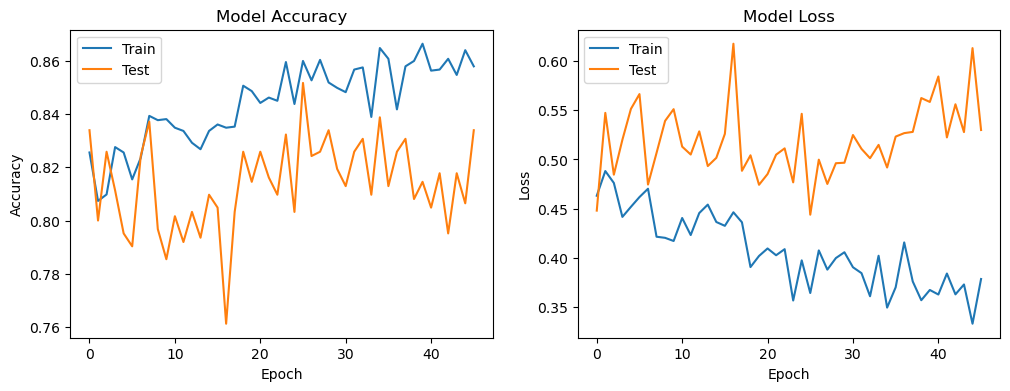

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [47]:
model7 = Sequential()
model7.add(Dense(1000, input_shape=(675,), activation='relu'))
model7.add(Dropout(.2))
model7.add(Dense(500, activation='relu'))
model7.add(Dropout(.2))
model7.add(Dense(250, activation='relu'))
model7.add(Dropout(.2))
model7.add(Dense(4, activation='softmax'))


model7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_7.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
model7.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history7 = model7.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model7.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 2s 14ms/step - loss: 1.3466 - accuracy: 0.3562 - val_loss: 1.2530 - val_accuracy: 0.4468
Epoch 2/100
18/78 [=====>........................] - ETA: 0s - loss: 1.2905 - accuracy: 0.3889

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 1s 11ms/step - loss: 1.2341 - accuracy: 0.4212 - val_loss: 1.0890 - val_accuracy: 0.5581
Epoch 3/100
78/78 [==============================] - 1s 11ms/step - loss: 1.0918 - accuracy: 0.5202 - val_loss: 1.0553 - val_accuracy: 0.5565
Epoch 4/100
78/78 [==============================] - 1s 11ms/step - loss: 0.9889 - accuracy: 0.5650 - val_loss: 0.8947 - val_accuracy: 0.6597
Epoch 5/100
78/78 [==============================] - 1s 11ms/step - loss: 0.9613 - accuracy: 0.5929 - val_loss: 0.9232 - val_accuracy: 0.5823
Epoch 6/100
78/78 [==============================] - 1s 11ms/step - loss: 0.9314 - accuracy: 0.6038 - val_loss: 0.9215 - val_accuracy: 0.6274
Epoch 7/100
78/78 [==============================] - 1s 10ms/step - loss: 0.8828 - accuracy: 0.6264 - val_loss: 0.8717 - val_accuracy: 0.6403
Epoch 8/100
78/78 [==============================] - 1s 10ms/step - loss: 0.8825 - accuracy: 0.6175 - val_loss: 0.8885 - val_accuracy: 0.6290
Epoch 9/100
78/78 

78/78 [==============================] - 1s 11ms/step - loss: 0.4288 - accuracy: 0.8376 - val_loss: 0.5503 - val_accuracy: 0.7919
Epoch 60/100
78/78 [==============================] - 1s 11ms/step - loss: 0.4782 - accuracy: 0.8227 - val_loss: 0.5547 - val_accuracy: 0.7952
Epoch 61/100
78/78 [==============================] - 1s 11ms/step - loss: 0.4263 - accuracy: 0.8389 - val_loss: 0.5138 - val_accuracy: 0.8145
Epoch 62/100
78/78 [==============================] - 1s 11ms/step - loss: 0.4276 - accuracy: 0.8417 - val_loss: 0.5522 - val_accuracy: 0.7919
Epoch 63/100
78/78 [==============================] - 1s 11ms/step - loss: 0.4197 - accuracy: 0.8384 - val_loss: 0.5194 - val_accuracy: 0.7919
Epoch 64/100
78/78 [==============================] - 1s 11ms/step - loss: 0.3923 - accuracy: 0.8437 - val_loss: 0.5347 - val_accuracy: 0.8000
Epoch 65/100
78/78 [==============================] - 1s 12ms/step - loss: 0.3744 - accuracy: 0.8570 - val_loss: 0.5139 - val_accuracy: 0.8065
Epoch 66/100

78/78 [==============================] - 1s 11ms/step - loss: 0.2709 - accuracy: 0.9035 - val_loss: 0.5397 - val_accuracy: 0.8242
Epoch 31/100
78/78 [==============================] - 1s 11ms/step - loss: 0.2908 - accuracy: 0.8914 - val_loss: 0.5445 - val_accuracy: 0.8161
Epoch 32/100
78/78 [==============================] - 1s 11ms/step - loss: 0.2814 - accuracy: 0.8962 - val_loss: 0.5444 - val_accuracy: 0.8129
Epoch 33/100
78/78 [==============================] - 1s 11ms/step - loss: 0.2710 - accuracy: 0.8986 - val_loss: 0.5010 - val_accuracy: 0.8452
Epoch 34/100
78/78 [==============================] - 1s 10ms/step - loss: 0.2719 - accuracy: 0.9019 - val_loss: 0.5015 - val_accuracy: 0.8355
Epoch 35/100
78/78 [==============================] - 1s 11ms/step - loss: 0.2597 - accuracy: 0.9047 - val_loss: 0.5064 - val_accuracy: 0.8290
Epoch 35: early stopping
20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.8

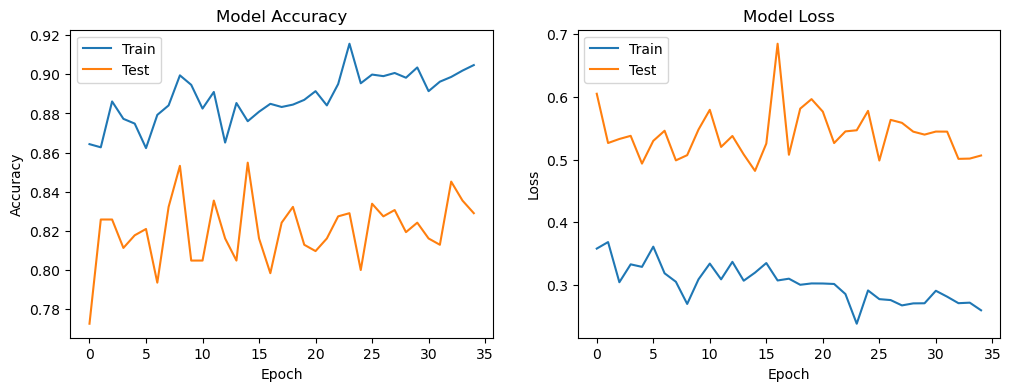

In [49]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [76]:
def create_model(X_train, y_train, X_test, y_test, optimizer, loss, activation):

    model = Sequential()
    model.add(Dense(600, input_shape=(675,), activation=activation))
    model.add(Dropout(.2))
    model.add(Dense(300, activation=activation))
    model.add(Dropout(.2))
    model.add(Dense(150, activation=activation))
    model.add(Dense(75, activation=activation))
    model.add(Dropout(.2))
    model.add(Dense(4, activation='softmax'))


    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
    model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])



    y_preds = model.predict(X_test)
    class_predictions = np.argmax(y_preds, axis=1)

    report = accuracy_score(class_predictions, y_test)
    return report



In [77]:
optimizers_list = ['SGD', 'Adam', 'RMSprop']
activation_functions_list = ['relu', 'sigmoid']


best_acc = 0
best_params = None

for optimizer in optimizers_list:
    for activation in activation_functions_list:
        
        accuracy = create_model(X_train, y_train, X_test, y_test,optimizer=optimizer, activation=activation, loss=loss)
        print(f'Optimizer = {optimizer}, Activation = {activation}, Loss = {loss}')
        print(f"Accuracy: {accuracy:.2%}")

        if accuracy > best_acc:
            best_acc = accuracy
            best_params = (optimizer, activation, loss)

print(f"Best Parameters: Optimizer = {best_params[0]}, Activation = {best_params[1]}, Loss Function = {best_params[2]} with Accuracy = {best_acc:.2%}")



Epoch 1/100
78/78 [==============================] - 1s 6ms/step - loss: 1.3687 - accuracy: 0.2900 - val_loss: 1.3371 - val_accuracy: 0.2952
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 1.3367 - accuracy: 0.3368 - val_loss: 1.3077 - val_accuracy: 0.4145
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 1.3177 - accuracy: 0.3744 - val_loss: 1.2796 - val_accuracy: 0.4613
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 1.2904 - accuracy: 0.4140 - val_loss: 1.2477 - val_accuracy: 0.4806
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 1.2754 - accuracy: 0.4269 - val_loss: 1.2210 - val_accuracy: 0.4887
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 1.2537 - accuracy: 0.4233 - val_loss: 1.2024 - val_accuracy: 0.4952
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 1.2311 - accuracy: 0.4317 - val_loss: 1.1742 - val_accuracy: 0.4919
Epoch 8/100
7

Epoch 59/100
78/78 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.7682 - val_loss: 1.0627 - val_accuracy: 0.5903
Epoch 60/100
78/78 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.7698 - val_loss: 0.5862 - val_accuracy: 0.8065
Epoch 61/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7831 - val_loss: 0.5628 - val_accuracy: 0.8145
Epoch 62/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.7888 - val_loss: 0.6938 - val_accuracy: 0.7145
Epoch 63/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7896 - val_loss: 0.6258 - val_accuracy: 0.7516
Epoch 64/100
78/78 [==============================] - 0s 5ms/step - loss: 0.5796 - accuracy: 0.7831 - val_loss: 1.0365 - val_accuracy: 0.5629
Epoch 65/100
78/78 [==============================] - 0s 5ms/step - loss: 0.5683 - accuracy: 0.7880 - val_loss: 0.6484 - val_accuracy: 0.7452
Epoch 

Epoch 16/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3744 - accuracy: 0.2888 - val_loss: 1.3506 - val_accuracy: 0.2952
Epoch 17/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3684 - accuracy: 0.2940 - val_loss: 1.3509 - val_accuracy: 0.2903
Epoch 18/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3669 - accuracy: 0.3195 - val_loss: 1.3529 - val_accuracy: 0.2952
Epoch 19/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3667 - accuracy: 0.2888 - val_loss: 1.3529 - val_accuracy: 0.2726
Epoch 20/100
78/78 [==============================] - 0s 4ms/step - loss: 1.3653 - accuracy: 0.2940 - val_loss: 1.3517 - val_accuracy: 0.2903
Epoch 21/100
78/78 [==============================] - 0s 4ms/step - loss: 1.3665 - accuracy: 0.2968 - val_loss: 1.3508 - val_accuracy: 0.2903
Epoch 22/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3711 - accuracy: 0.2912 - val_loss: 1.3509 - val_accuracy: 0.2919
Epoch 

78/78 [==============================] - 0s 6ms/step - loss: 0.5205 - accuracy: 0.7944 - val_loss: 0.5063 - val_accuracy: 0.8113
Epoch 49/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7956 - val_loss: 0.5504 - val_accuracy: 0.7968
Epoch 50/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5007 - accuracy: 0.7981 - val_loss: 0.5322 - val_accuracy: 0.8226
Epoch 51/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.8110 - val_loss: 0.5192 - val_accuracy: 0.7984
Epoch 52/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.8053 - val_loss: 0.4989 - val_accuracy: 0.8161
Epoch 53/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.8239 - val_loss: 0.4527 - val_accuracy: 0.8274
Epoch 54/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4554 - accuracy: 0.8255 - val_loss: 0.4832 - val_accuracy: 0.8306
Epoch 55/100
78/78 

Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0645 - accuracy: 0.5468 - val_loss: 0.9749 - val_accuracy: 0.5903
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0475 - accuracy: 0.5569 - val_loss: 0.9349 - val_accuracy: 0.6274
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0295 - accuracy: 0.5662 - val_loss: 0.9385 - val_accuracy: 0.6210
Epoch 8/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0011 - accuracy: 0.5868 - val_loss: 0.9198 - val_accuracy: 0.6403
Epoch 9/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0020 - accuracy: 0.5880 - val_loss: 0.9520 - val_accuracy: 0.6403
Epoch 10/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9868 - accuracy: 0.5913 - val_loss: 0.9291 - val_accuracy: 0.6226
Epoch 11/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9476 - accuracy: 0.6195 - val_loss: 0.8808 - val_accuracy: 0.6597
Epoch 12/10

Epoch 63/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5354 - accuracy: 0.7944 - val_loss: 0.5684 - val_accuracy: 0.7984
Epoch 64/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5164 - accuracy: 0.8037 - val_loss: 0.5556 - val_accuracy: 0.7823
Epoch 65/100
78/78 [==============================] - 1s 8ms/step - loss: 0.5135 - accuracy: 0.8009 - val_loss: 0.5587 - val_accuracy: 0.7823
Epoch 66/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5030 - accuracy: 0.7989 - val_loss: 0.5849 - val_accuracy: 0.7629
Epoch 67/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5163 - accuracy: 0.8053 - val_loss: 0.5972 - val_accuracy: 0.7806
Epoch 68/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5211 - accuracy: 0.7977 - val_loss: 0.5747 - val_accuracy: 0.7581
Epoch 69/100
78/78 [==============================] - 1s 7ms/step - loss: 0.4891 - accuracy: 0.8049 - val_loss: 0.5646 - val_accuracy: 0.7919
Epoch 

78/78 [==============================] - 0s 5ms/step - loss: 0.6989 - accuracy: 0.7092 - val_loss: 0.8582 - val_accuracy: 0.5952
Epoch 22/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.7052 - val_loss: 0.9023 - val_accuracy: 0.5919
Epoch 23/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.7185 - val_loss: 1.5620 - val_accuracy: 0.5339
Epoch 24/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.7262 - val_loss: 0.9896 - val_accuracy: 0.6113
Epoch 25/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6581 - accuracy: 0.7242 - val_loss: 0.7942 - val_accuracy: 0.6468
Epoch 26/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.7270 - val_loss: 0.7246 - val_accuracy: 0.6984
Epoch 27/100
78/78 [==============================] - 0s 5ms/step - loss: 0.6316 - accuracy: 0.7431 - val_loss: 0.8176 - val_accuracy: 0.6952
Epoch 28/100
78/78 

Epoch 79/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3414 - accuracy: 0.8776 - val_loss: 0.6765 - val_accuracy: 0.7823
Epoch 80/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3381 - accuracy: 0.8708 - val_loss: 0.7551 - val_accuracy: 0.8081
Epoch 81/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3435 - accuracy: 0.8667 - val_loss: 0.8125 - val_accuracy: 0.8016
Epoch 82/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3267 - accuracy: 0.8861 - val_loss: 0.8257 - val_accuracy: 0.7565
Epoch 83/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.8821 - val_loss: 0.7202 - val_accuracy: 0.8339
Epoch 84/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3700 - accuracy: 0.8756 - val_loss: 0.8459 - val_accuracy: 0.7661
Epoch 85/100
78/78 [==============================] - 0s 5ms/step - loss: 0.3390 - accuracy: 0.8780 - val_loss: 0.8289 - val_accuracy: 0.8306
Epoch 

78/78 [==============================] - 0s 5ms/step - loss: 0.9175 - accuracy: 0.6341 - val_loss: 0.9548 - val_accuracy: 0.6081
Epoch 46/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9113 - accuracy: 0.6353 - val_loss: 0.8787 - val_accuracy: 0.6548
Epoch 47/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9083 - accuracy: 0.6321 - val_loss: 0.8883 - val_accuracy: 0.6258
Epoch 48/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9107 - accuracy: 0.6264 - val_loss: 1.0647 - val_accuracy: 0.4935
Epoch 49/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8929 - accuracy: 0.6462 - val_loss: 0.8523 - val_accuracy: 0.6694
Epoch 50/100
78/78 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.6446 - val_loss: 0.8607 - val_accuracy: 0.6516
Epoch 51/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8925 - accuracy: 0.6442 - val_loss: 0.8757 - val_accuracy: 0.6629
Epoch 52/100
78/78 

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical
import numpy as np

# Combine X_train and X_test for cross-validation
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Convert labels to categorical
y_cat = to_categorical(y, num_classes=4)
dropouts = [.2, .25, .3]

best_acc = 0
best_drop = None

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
for drop in dropouts:
    fold_no = 1
    for train, test in kfold.split(X, y):
        # Create the model
        model = Sequential()
        model.add(Dense(600, input_shape=(675,), activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(300, activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(150, activation='relu'))
        model.add(Dense(75, activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(4, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Generate a print
        print(f'Training for fold {fold_no} ...')

        # Fit data to model
        early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
        model.fit(X[train], y_cat[train], epochs=100, validation_data=(X[test], y_cat[test]), callbacks=[early_stop])

        # Generate generalization metrics
        y_preds = model.predict(X[test])
        class_predictions = np.argmax(y_preds, axis=1)
        y_test_fold = np.argmax(y_cat[test], axis=1)
        accuracy = accuracy_score(y_test_fold, class_predictions)

        print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {accuracy};')
        print(classification_report(y_test_fold, class_predictions))

        if accuracy > best_acc:
            best_acc = accuracy
            best_drop = drop

        # Increase fold number
        fold_no += 1

print(f"Best accuracy = {best_acc}, Best dropout = {best_drop}")



Training for fold 1 ...
Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 1.3599 - accuracy: 0.3445 - val_loss: 1.2716 - val_accuracy: 0.4097
Epoch 2/100
78/78 [==============================] - 0s 6ms/step - loss: 1.2794 - accuracy: 0.3982 - val_loss: 1.1866 - val_accuracy: 0.4694
Epoch 3/100
78/78 [==============================] - 0s 6ms/step - loss: 1.1583 - accuracy: 0.4964 - val_loss: 1.0495 - val_accuracy: 0.5435
Epoch 4/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0735 - accuracy: 0.5335 - val_loss: 1.0319 - val_accuracy: 0.5452
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0080 - accuracy: 0.5610 - val_loss: 0.9009 - val_accuracy: 0.6306
Epoch 6/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9491 - accuracy: 0.5969 - val_loss: 0.8753 - val_accuracy: 0.6242
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9523 - accuracy: 0.5941 - val_loss: 0.9196 - val_accura

78/78 [==============================] - 0s 6ms/step - loss: 0.4815 - accuracy: 0.8162 - val_loss: 0.5072 - val_accuracy: 0.8323
Epoch 59/100
78/78 [==============================] - 1s 7ms/step - loss: 0.3905 - accuracy: 0.8526 - val_loss: 0.5511 - val_accuracy: 0.8065
Epoch 60/100
78/78 [==============================] - 1s 6ms/step - loss: 0.4229 - accuracy: 0.8372 - val_loss: 0.5842 - val_accuracy: 0.8129
Epoch 61/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4231 - accuracy: 0.8393 - val_loss: 0.5838 - val_accuracy: 0.8065
Epoch 62/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4392 - accuracy: 0.8348 - val_loss: 0.5309 - val_accuracy: 0.8194
Epoch 63/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8352 - val_loss: 0.6200 - val_accuracy: 0.7984
Epoch 64/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4047 - accuracy: 0.8481 - val_loss: 0.5273 - val_accuracy: 0.8387
Epoch 65/100
78/78 

Epoch 12/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7778 - accuracy: 0.6839 - val_loss: 0.8338 - val_accuracy: 0.6430
Epoch 13/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7744 - accuracy: 0.6807 - val_loss: 0.7698 - val_accuracy: 0.6995
Epoch 14/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7610 - accuracy: 0.6932 - val_loss: 0.7568 - val_accuracy: 0.7092
Epoch 15/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7588 - accuracy: 0.6871 - val_loss: 0.7450 - val_accuracy: 0.6914
Epoch 16/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7309 - accuracy: 0.6936 - val_loss: 0.7603 - val_accuracy: 0.6995
Epoch 17/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7381 - accuracy: 0.6992 - val_loss: 0.7363 - val_accuracy: 0.7221
Epoch 18/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.7174 - val_loss: 0.7383 - val_accuracy: 0.7254
Epoch 

Epoch 70/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.8312 - val_loss: 0.5590 - val_accuracy: 0.8045
Epoch 71/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4177 - accuracy: 0.8446 - val_loss: 0.5592 - val_accuracy: 0.7948
Epoch 72/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4086 - accuracy: 0.8361 - val_loss: 0.5606 - val_accuracy: 0.8126
Epoch 73/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4380 - accuracy: 0.8329 - val_loss: 0.5207 - val_accuracy: 0.8207
Epoch 74/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8341 - val_loss: 0.5470 - val_accuracy: 0.8110
Epoch 75/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 0.8522 - val_loss: 0.5852 - val_accuracy: 0.8142
Epoch 76/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3864 - accuracy: 0.8526 - val_loss: 0.5001 - val_accuracy: 0.8320
Epoch 

Epoch 24/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6127 - accuracy: 0.7562 - val_loss: 0.7156 - val_accuracy: 0.7318
Epoch 25/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6277 - accuracy: 0.7513 - val_loss: 0.6625 - val_accuracy: 0.7464
Epoch 26/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.7602 - val_loss: 0.6676 - val_accuracy: 0.7593
Epoch 27/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.7723 - val_loss: 0.7105 - val_accuracy: 0.7141
Epoch 28/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.7719 - val_loss: 0.6976 - val_accuracy: 0.7447
Epoch 29/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.7574 - val_loss: 0.6849 - val_accuracy: 0.7609
Epoch 30/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7844 - val_loss: 0.6467 - val_accuracy: 0.7496
Epoch 

Epoch 82/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4023 - accuracy: 0.8502 - val_loss: 0.5616 - val_accuracy: 0.7932
Epoch 83/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3605 - accuracy: 0.8736 - val_loss: 0.6988 - val_accuracy: 0.7754
Epoch 84/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.8656 - val_loss: 0.5965 - val_accuracy: 0.8158
Epoch 85/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3522 - accuracy: 0.8688 - val_loss: 0.6069 - val_accuracy: 0.8094
Epoch 85: early stopping
20/20 [==============================] - 0s 2ms/step
Score for fold 3: accuracy of 0.8093699515347335;
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       180
           1       0.71      0.83      0.76       182
           2       0.86      0.86      0.86        88
           3       0.92      0.77      0.84       169

    accuracy                    

78/78 [==============================] - 0s 6ms/step - loss: 0.4848 - accuracy: 0.8107 - val_loss: 0.6943 - val_accuracy: 0.7577
Epoch 51/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5045 - accuracy: 0.8026 - val_loss: 0.6279 - val_accuracy: 0.7803
Epoch 52/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.8377 - val_loss: 0.5927 - val_accuracy: 0.7803
Epoch 53/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4909 - accuracy: 0.8078 - val_loss: 0.6708 - val_accuracy: 0.7593
Epoch 54/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5016 - accuracy: 0.8034 - val_loss: 0.5993 - val_accuracy: 0.7754
Epoch 55/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.8119 - val_loss: 0.6387 - val_accuracy: 0.7706
Epoch 56/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4076 - accuracy: 0.8526 - val_loss: 0.6439 - val_accuracy: 0.7625
Epoch 57/100
78/78 

Epoch 16/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7528 - accuracy: 0.6964 - val_loss: 0.8109 - val_accuracy: 0.6753
Epoch 17/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7216 - accuracy: 0.7077 - val_loss: 0.7398 - val_accuracy: 0.7157
Epoch 18/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.7291 - val_loss: 0.7772 - val_accuracy: 0.6914
Epoch 19/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7708 - accuracy: 0.6948 - val_loss: 0.7654 - val_accuracy: 0.6931
Epoch 20/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7154 - accuracy: 0.7109 - val_loss: 0.7668 - val_accuracy: 0.7060
Epoch 21/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7347 - accuracy: 0.7077 - val_loss: 0.7881 - val_accuracy: 0.7141
Epoch 22/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.7263 - val_loss: 0.7239 - val_accuracy: 0.7173
Epoch 

Epoch 74/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3781 - accuracy: 0.8502 - val_loss: 0.6636 - val_accuracy: 0.7787
Epoch 75/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.8543 - val_loss: 0.5943 - val_accuracy: 0.8191
Epoch 76/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.8656 - val_loss: 0.6205 - val_accuracy: 0.8110
Epoch 77/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3543 - accuracy: 0.8684 - val_loss: 0.6094 - val_accuracy: 0.8045
Epoch 78/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3605 - accuracy: 0.8720 - val_loss: 0.7038 - val_accuracy: 0.7771
Epoch 79/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 0.8648 - val_loss: 0.6398 - val_accuracy: 0.7932
Epoch 80/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3514 - accuracy: 0.8724 - val_loss: 0.6585 - val_accuracy: 0.8110
Epoch 

78/78 [==============================] - 0s 6ms/step - loss: 0.6199 - accuracy: 0.7573 - val_loss: 0.6819 - val_accuracy: 0.7323
Epoch 39/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7811 - val_loss: 0.6928 - val_accuracy: 0.7258
Epoch 40/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5742 - accuracy: 0.7746 - val_loss: 0.7139 - val_accuracy: 0.7226
Epoch 41/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5483 - accuracy: 0.7940 - val_loss: 0.6897 - val_accuracy: 0.7387
Epoch 42/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.7896 - val_loss: 0.7032 - val_accuracy: 0.7500
Epoch 43/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5710 - accuracy: 0.7791 - val_loss: 0.7693 - val_accuracy: 0.7403
Epoch 44/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.7815 - val_loss: 0.6830 - val_accuracy: 0.7419
Epoch 45/100
78/78 

Epoch 18/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7865 - accuracy: 0.6819 - val_loss: 0.7527 - val_accuracy: 0.7157
Epoch 19/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7979 - accuracy: 0.6681 - val_loss: 0.7716 - val_accuracy: 0.6979
Epoch 20/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7517 - accuracy: 0.6904 - val_loss: 0.7247 - val_accuracy: 0.7157
Epoch 21/100
78/78 [==============================] - 1s 6ms/step - loss: 0.7523 - accuracy: 0.6948 - val_loss: 0.7109 - val_accuracy: 0.7318
Epoch 22/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7242 - accuracy: 0.7041 - val_loss: 0.7462 - val_accuracy: 0.7092
Epoch 23/100
78/78 [==============================] - 1s 7ms/step - loss: 0.7453 - accuracy: 0.6904 - val_loss: 0.7386 - val_accuracy: 0.7173
Epoch 24/100
78/78 [==============================] - 1s 7ms/step - loss: 0.7130 - accuracy: 0.7113 - val_loss: 0.7467 - val_accuracy: 0.7092
Epoch 

Epoch 76/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4706 - accuracy: 0.8167 - val_loss: 0.4995 - val_accuracy: 0.8352
Epoch 77/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8292 - val_loss: 0.4990 - val_accuracy: 0.8352
Epoch 78/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4562 - accuracy: 0.8224 - val_loss: 0.4703 - val_accuracy: 0.8158
Epoch 79/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4617 - accuracy: 0.8248 - val_loss: 0.5460 - val_accuracy: 0.8223
Epoch 80/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.8054 - val_loss: 0.5236 - val_accuracy: 0.8078
Epoch 81/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4925 - accuracy: 0.8123 - val_loss: 0.5398 - val_accuracy: 0.8078
Epoch 82/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.8280 - val_loss: 0.5434 - val_accuracy: 0.8078
Epoch 

Epoch 30/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6607 - accuracy: 0.7380 - val_loss: 0.7385 - val_accuracy: 0.7254
Epoch 31/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6104 - accuracy: 0.7614 - val_loss: 0.7290 - val_accuracy: 0.7480
Epoch 32/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.7473 - val_loss: 0.7467 - val_accuracy: 0.7318
Epoch 33/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6006 - accuracy: 0.7683 - val_loss: 0.7083 - val_accuracy: 0.7415
Epoch 34/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5935 - accuracy: 0.7662 - val_loss: 0.6957 - val_accuracy: 0.7738
Epoch 35/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.7562 - val_loss: 0.7652 - val_accuracy: 0.7334
Epoch 36/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.7695 - val_loss: 0.7523 - val_accuracy: 0.7237
Epoch 

78/78 [==============================] - 0s 6ms/step - loss: 0.7124 - accuracy: 0.7142 - val_loss: 0.7140 - val_accuracy: 0.7318
Epoch 30/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.7408 - val_loss: 0.6923 - val_accuracy: 0.7302
Epoch 31/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.7400 - val_loss: 0.7051 - val_accuracy: 0.7221
Epoch 32/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.7380 - val_loss: 0.6895 - val_accuracy: 0.7286
Epoch 33/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6552 - accuracy: 0.7424 - val_loss: 0.6776 - val_accuracy: 0.7286
Epoch 34/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6477 - accuracy: 0.7505 - val_loss: 0.6631 - val_accuracy: 0.7205
Epoch 35/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6592 - accuracy: 0.7307 - val_loss: 0.6467 - val_accuracy: 0.7480
Epoch 36/100
78/78 

Epoch 87/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4263 - accuracy: 0.8389 - val_loss: 0.5851 - val_accuracy: 0.8078
Epoch 88/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8518 - val_loss: 0.6137 - val_accuracy: 0.8078
Epoch 89/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8337 - val_loss: 0.5543 - val_accuracy: 0.8029
Epoch 90/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8421 - val_loss: 0.6153 - val_accuracy: 0.7835
Epoch 91/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3994 - accuracy: 0.8543 - val_loss: 0.5789 - val_accuracy: 0.8126
Epoch 92/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4324 - accuracy: 0.8381 - val_loss: 0.6559 - val_accuracy: 0.7544
Epoch 93/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4233 - accuracy: 0.8466 - val_loss: 0.5912 - val_accuracy: 0.8078
Epoch 

Epoch 41/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5946 - accuracy: 0.7763 - val_loss: 0.6446 - val_accuracy: 0.7512
Epoch 42/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.7658 - val_loss: 0.6489 - val_accuracy: 0.7512
Epoch 43/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6227 - accuracy: 0.7582 - val_loss: 0.6476 - val_accuracy: 0.7641
Epoch 44/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.7618 - val_loss: 0.6710 - val_accuracy: 0.7415
Epoch 45/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6169 - accuracy: 0.7638 - val_loss: 0.7945 - val_accuracy: 0.6947
Epoch 46/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6460 - accuracy: 0.7457 - val_loss: 0.7320 - val_accuracy: 0.7270
Epoch 47/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.7574 - val_loss: 0.6769 - val_accuracy: 0.7399
Epoch 

Epoch 1/100
78/78 [==============================] - 1s 7ms/step - loss: 1.3622 - accuracy: 0.3312 - val_loss: 1.2893 - val_accuracy: 0.3613
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 1.2769 - accuracy: 0.3962 - val_loss: 1.1633 - val_accuracy: 0.4710
Epoch 3/100
78/78 [==============================] - 0s 6ms/step - loss: 1.1897 - accuracy: 0.4495 - val_loss: 1.0963 - val_accuracy: 0.5435
Epoch 4/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0909 - accuracy: 0.5226 - val_loss: 0.9854 - val_accuracy: 0.5806
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 1.0475 - accuracy: 0.5424 - val_loss: 1.0099 - val_accuracy: 0.5661
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 1.0096 - accuracy: 0.5380 - val_loss: 0.9551 - val_accuracy: 0.6113
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9704 - accuracy: 0.5715 - val_loss: 0.9166 - val_accuracy: 0.6016
Epoch 8/100
7

Epoch 59/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6320 - accuracy: 0.7387 - val_loss: 0.7030 - val_accuracy: 0.7274
Epoch 60/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6220 - accuracy: 0.7524 - val_loss: 0.6322 - val_accuracy: 0.7629
Epoch 61/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.7480 - val_loss: 0.6554 - val_accuracy: 0.7403
Epoch 62/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.7290 - val_loss: 0.6503 - val_accuracy: 0.7758
Epoch 63/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.7504 - val_loss: 0.6257 - val_accuracy: 0.7790
Epoch 64/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6045 - accuracy: 0.7581 - val_loss: 0.6383 - val_accuracy: 0.7645
Epoch 65/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5711 - accuracy: 0.7754 - val_loss: 0.6510 - val_accuracy: 0.7774
Epoch 

78/78 [==============================] - 0s 6ms/step - loss: 0.8448 - accuracy: 0.6443 - val_loss: 0.7905 - val_accuracy: 0.6817
Epoch 17/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8351 - accuracy: 0.6468 - val_loss: 0.7503 - val_accuracy: 0.6914
Epoch 18/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8339 - accuracy: 0.6484 - val_loss: 0.7470 - val_accuracy: 0.7060
Epoch 19/100
78/78 [==============================] - 1s 7ms/step - loss: 0.8277 - accuracy: 0.6516 - val_loss: 0.7800 - val_accuracy: 0.6979
Epoch 20/100
78/78 [==============================] - 1s 7ms/step - loss: 0.8022 - accuracy: 0.6621 - val_loss: 0.7419 - val_accuracy: 0.6979
Epoch 21/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7812 - accuracy: 0.6694 - val_loss: 0.7065 - val_accuracy: 0.7205
Epoch 22/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.6786 - val_loss: 0.7248 - val_accuracy: 0.7254
Epoch 23/100
78/78 

Epoch 74/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5693 - accuracy: 0.7711 - val_loss: 0.5697 - val_accuracy: 0.7981
Epoch 75/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5729 - accuracy: 0.7804 - val_loss: 0.6049 - val_accuracy: 0.7884
Epoch 76/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.7917 - val_loss: 0.5674 - val_accuracy: 0.7916
Epoch 77/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7893 - val_loss: 0.5903 - val_accuracy: 0.7819
Epoch 78/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5409 - accuracy: 0.7985 - val_loss: 0.5890 - val_accuracy: 0.7754
Epoch 79/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7824 - val_loss: 0.5757 - val_accuracy: 0.7916
Epoch 80/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5193 - accuracy: 0.8026 - val_loss: 0.5498 - val_accuracy: 0.8029
Epoch 

Epoch 28/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7350 - accuracy: 0.7085 - val_loss: 0.8332 - val_accuracy: 0.6624
Epoch 29/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7289 - accuracy: 0.7073 - val_loss: 0.8107 - val_accuracy: 0.6914
Epoch 30/100
78/78 [==============================] - 1s 6ms/step - loss: 0.7061 - accuracy: 0.7101 - val_loss: 0.8486 - val_accuracy: 0.6979
Epoch 31/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.7122 - val_loss: 0.8376 - val_accuracy: 0.6656
Epoch 32/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.7154 - val_loss: 0.7834 - val_accuracy: 0.6979
Epoch 33/100
78/78 [==============================] - 1s 7ms/step - loss: 0.6872 - accuracy: 0.7239 - val_loss: 0.8061 - val_accuracy: 0.6979
Epoch 34/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.7122 - val_loss: 0.8031 - val_accuracy: 0.6850
Epoch 

Epoch 86/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7981 - val_loss: 0.7173 - val_accuracy: 0.7754
Epoch 87/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4768 - accuracy: 0.8280 - val_loss: 0.7396 - val_accuracy: 0.7641
Epoch 88/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4928 - accuracy: 0.8139 - val_loss: 0.6906 - val_accuracy: 0.7674
Epoch 89/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4837 - accuracy: 0.8151 - val_loss: 0.7169 - val_accuracy: 0.7690
Epoch 90/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4732 - accuracy: 0.8131 - val_loss: 0.7374 - val_accuracy: 0.7415
Epoch 91/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.8175 - val_loss: 0.7397 - val_accuracy: 0.7544
Epoch 92/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5466 - accuracy: 0.7937 - val_loss: 0.7155 - val_accuracy: 0.7609
Epoch 

Epoch 40/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6806 - accuracy: 0.7420 - val_loss: 0.7846 - val_accuracy: 0.6850
Epoch 41/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.7396 - val_loss: 0.7186 - val_accuracy: 0.7011
Epoch 42/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7028 - accuracy: 0.7186 - val_loss: 0.7425 - val_accuracy: 0.7011
Epoch 43/100
78/78 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.7239 - val_loss: 0.7535 - val_accuracy: 0.6914
Epoch 44/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.7541 - val_loss: 0.7293 - val_accuracy: 0.7157
Epoch 45/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.7432 - val_loss: 0.7306 - val_accuracy: 0.7157
Epoch 46/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6379 - accuracy: 0.7493 - val_loss: 0.6993 - val_accuracy: 0.7157
Epoch 

Epoch 98/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.8014 - val_loss: 0.6542 - val_accuracy: 0.7496
Epoch 99/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5276 - accuracy: 0.7981 - val_loss: 0.6606 - val_accuracy: 0.7496
Epoch 100/100
20/20 [==============================] - 0s 2ms/step
Score for fold 4: accuracy of 0.7253634894991923;
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       180
           1       0.75      0.51      0.61       183
           2       0.68      0.92      0.78        87
           3       0.85      0.76      0.81       169

    accuracy                           0.73       619
   macro avg       0.73      0.75      0.73       619
weighted avg       0.74      0.73      0.72       619

Training for fold 5 ...
Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 1.3672 - accuracy: 0.3076 - val_loss: 1.2702 - val_accuracy: 0.3570

Epoch 52/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5856 - accuracy: 0.7671 - val_loss: 0.6398 - val_accuracy: 0.7544
Epoch 53/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5850 - accuracy: 0.7723 - val_loss: 0.6693 - val_accuracy: 0.7577
Epoch 54/100
78/78 [==============================] - 1s 7ms/step - loss: 0.6240 - accuracy: 0.7562 - val_loss: 0.7292 - val_accuracy: 0.7270
Epoch 55/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.7590 - val_loss: 0.6654 - val_accuracy: 0.7528
Epoch 56/100
78/78 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.7626 - val_loss: 0.6426 - val_accuracy: 0.7561
Epoch 57/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5849 - accuracy: 0.7780 - val_loss: 0.7074 - val_accuracy: 0.7351
Epoch 58/100
78/78 [==============================] - 0s 6ms/step - loss: 0.5509 - accuracy: 0.7933 - val_loss: 0.6703 - val_accuracy: 0.7577
Epoch 

Dropout of 20% had the best average performance and the all time highest accuracy score for any individual train test split. 

I will now test sparse_categorical_crossentropy vs categorical_crossentropy

In [88]:
final_model_sparse = Sequential()
final_model_sparse.add(Dense(600, input_shape=(675,), activation='relu'))
final_model_sparse.add(Dropout(.2))
final_model_sparse.add(Dense(300, activation='relu'))
final_model_sparse.add(Dropout(.2))
final_model_sparse.add(Dense(150, activation='relu'))
final_model_sparse.add(Dense(75, activation='relu'))
final_model_sparse.add(Dropout(.2))
final_model_sparse.add(Dense(4, activation='softmax'))


final_model_sparse.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint('final_model.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
final_model_sparse.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
final_history_sparse = final_model_sparse.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = final_model_sparse.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 1.3429 - accuracy: 0.3304 - val_loss: 1.2463 - val_accuracy: 0.4258
Epoch 2/100
30/78 [==========>...................] - ETA: 0s - loss: 1.2495 - accuracy: 0.4281

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 0s 6ms/step - loss: 1.2078 - accuracy: 0.4418 - val_loss: 1.0741 - val_accuracy: 0.5387
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 1.1052 - accuracy: 0.5137 - val_loss: 1.0283 - val_accuracy: 0.5677
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0320 - accuracy: 0.5505 - val_loss: 0.9306 - val_accuracy: 0.6032
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9916 - accuracy: 0.5646 - val_loss: 0.9642 - val_accuracy: 0.6081
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9448 - accuracy: 0.5848 - val_loss: 0.8818 - val_accuracy: 0.6274
Epoch 7/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9175 - accuracy: 0.5953 - val_loss: 0.8638 - val_accuracy: 0.6323
Epoch 8/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8755 - accuracy: 0.6240 - val_loss: 0.9362 - val_accuracy: 0.6032
Epoch 9/100
78/78 [======

Epoch 60/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4206 - accuracy: 0.8360 - val_loss: 0.6354 - val_accuracy: 0.7661
Epoch 61/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.8247 - val_loss: 0.5488 - val_accuracy: 0.8065
Epoch 62/100
78/78 [==============================] - 1s 7ms/step - loss: 0.4338 - accuracy: 0.8421 - val_loss: 0.5939 - val_accuracy: 0.7758
Epoch 63/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4363 - accuracy: 0.8380 - val_loss: 0.5773 - val_accuracy: 0.7742
Epoch 64/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.8231 - val_loss: 0.5571 - val_accuracy: 0.8048
Epoch 65/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8397 - val_loss: 0.5306 - val_accuracy: 0.7968
Epoch 66/100
78/78 [==============================] - 1s 6ms/step - loss: 0.4609 - accuracy: 0.8267 - val_loss: 0.5584 - val_accuracy: 0.7871
Epoch 

78/78 [==============================] - 0s 6ms/step - loss: 0.3202 - accuracy: 0.8837 - val_loss: 0.4858 - val_accuracy: 0.8194
Epoch 18/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3037 - accuracy: 0.8829 - val_loss: 0.5208 - val_accuracy: 0.8194
Epoch 19/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3388 - accuracy: 0.8809 - val_loss: 0.4614 - val_accuracy: 0.8452
Epoch 20/100
78/78 [==============================] - 1s 7ms/step - loss: 0.2909 - accuracy: 0.8946 - val_loss: 0.4875 - val_accuracy: 0.8403
Epoch 21/100
78/78 [==============================] - 1s 7ms/step - loss: 0.2884 - accuracy: 0.8982 - val_loss: 0.4982 - val_accuracy: 0.8242
Epoch 22/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.8845 - val_loss: 0.4861 - val_accuracy: 0.8258
Epoch 23/100
78/78 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.8788 - val_loss: 0.4794 - val_accuracy: 0.8306
Epoch 24/100
78/78 

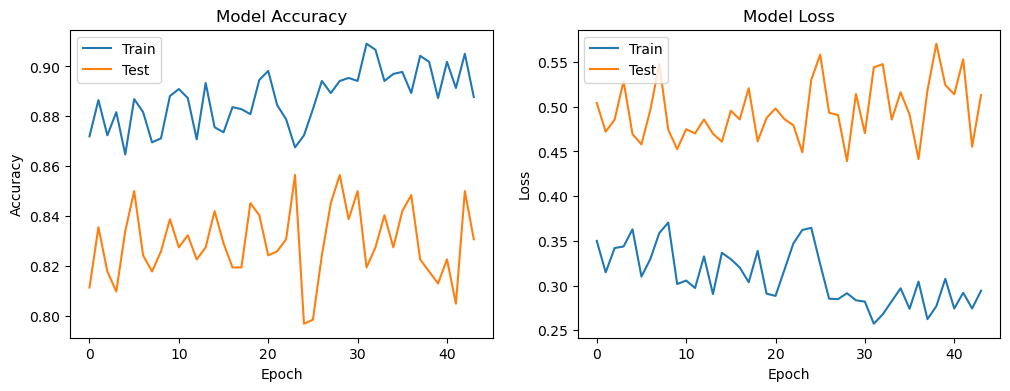

In [89]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(final_history_sparse.history['accuracy'])
plt.plot(final_history_sparse.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(final_history_sparse.history['loss'])
plt.plot(final_history_sparse.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

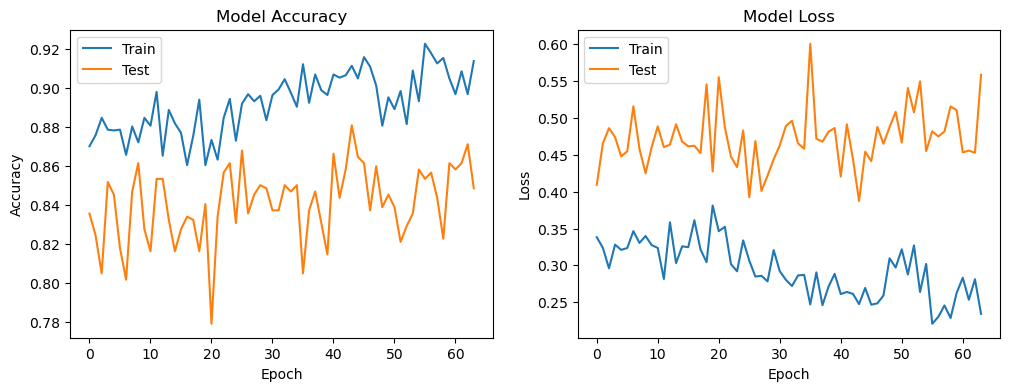

In [82]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(final_history_sparse.history['accuracy'])
plt.plot(final_history_sparse.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(final_history_sparse.history['loss'])
plt.plot(final_history_sparse.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [87]:
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# Model definition remains the same
final_model_CC = Sequential()
final_model_CC.add(Dense(600, input_shape=(675,), activation='relu'))
final_model_CC.add(Dropout(.2))
final_model_CC.add(Dense(300, activation='relu'))
final_model_CC.add(Dropout(.2))
final_model_CC.add(Dense(150, activation='relu'))
final_model_CC.add(Dense(75, activation='relu'))
final_model_CC.add(Dropout(.2))
final_model_CC.add(Dense(4, activation='softmax'))

# Compile the model using 'categorical_crossentropy'
final_model_CC.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('final_model.h5', monitor='accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')

# Fit the model
final_model_CC.fit(X_train, y_train_cat, epochs=100, validation_data=(X_test, y_test_cat), callbacks=[checkpoint, early_stop])

# Predict and evaluate
y_preds = final_model_CC.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1) # Convert back to class labels for evaluation
print(classification_report(y_test_labels, class_predictions))


Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 1.3587 - accuracy: 0.3207 - val_loss: 1.2822 - val_accuracy: 0.3661
Epoch 2/100
21/78 [=======>......................] - ETA: 0s - loss: 1.2896 - accuracy: 0.3988

C:\Users\mainf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 0s 6ms/step - loss: 1.2510 - accuracy: 0.4103 - val_loss: 1.1383 - val_accuracy: 0.4903
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 1.1158 - accuracy: 0.4988 - val_loss: 1.0466 - val_accuracy: 0.5677
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 1.0508 - accuracy: 0.5412 - val_loss: 1.0107 - val_accuracy: 0.5726
Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9844 - accuracy: 0.5666 - val_loss: 0.8883 - val_accuracy: 0.6419
Epoch 6/100
78/78 [==============================] - 1s 7ms/step - loss: 0.9339 - accuracy: 0.6038 - val_loss: 0.8461 - val_accuracy: 0.6339
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.9201 - accuracy: 0.6050 - val_loss: 0.8343 - val_accuracy: 0.6742
Epoch 8/100
78/78 [==============================] - 0s 6ms/step - loss: 0.8792 - accuracy: 0.6393 - val_loss: 0.8093 - val_accuracy: 0.6694
Epoch 9/100
78/78 [======

Epoch 60/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.8243 - val_loss: 0.5262 - val_accuracy: 0.8194
Epoch 61/100
78/78 [==============================] - 1s 7ms/step - loss: 0.4510 - accuracy: 0.8308 - val_loss: 0.5005 - val_accuracy: 0.8194
Epoch 62/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4954 - accuracy: 0.8102 - val_loss: 0.5047 - val_accuracy: 0.8113
Epoch 63/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.8162 - val_loss: 0.4780 - val_accuracy: 0.8274
Epoch 64/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4573 - accuracy: 0.8296 - val_loss: 0.5463 - val_accuracy: 0.8194
Epoch 65/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4563 - accuracy: 0.8279 - val_loss: 0.5233 - val_accuracy: 0.8048
Epoch 66/100
78/78 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.8288 - val_loss: 0.5040 - val_accuracy: 0.8339
Epoch 